(-0.5, 479.5, 269.5, -0.5)

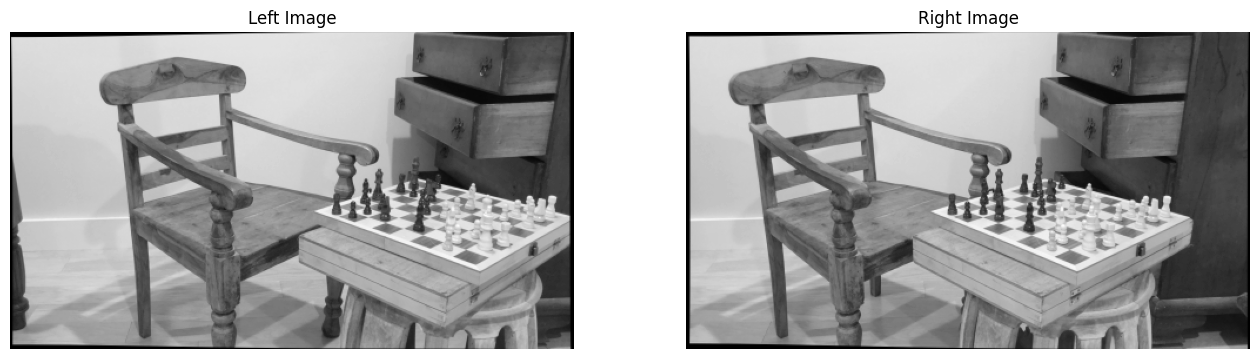

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

l_image = cv2.imread("left1.png", cv2.IMREAD_GRAYSCALE)
r_image = cv2.imread("right1.png", cv2.IMREAD_GRAYSCALE)

# scale down images to run the plane sweep algorithm more efficiently
scale = 0.25
l_image= cv2.resize(l_image, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
r_image = cv2.resize(r_image, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

plt.figure(figsize=(16, 12))

# show original images
plt.subplot(1, 2, 1)
plt.imshow(l_image, cmap="gray")
plt.title("Left Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(r_image, cmap="gray")
plt.title("Right Image")
plt.axis("off")

In [53]:
num_disparities=64
block_size=5

height, width = l_image.shape
disparity_map = np.zeros((height, width), dtype=np.float32)

# will be used to store costs (SSD, SAD) for each pixel at different disparity levels
cost_volume = np.full((num_disparities, height, width), np.inf)

# list of right images, each shifted by d pixels along horizontol axis
shifted_images = np.array([np.roll(r_image, shift=d, axis=1) for d in range(num_disparities)])

# compute SSD for all disparities
#ssd = (l_image.astype(np.float32)[None, :, :] - shifted_images.astype(np.float32))**2

# compute SAD for all disparities
sad = np.abs(l_image.astype(np.float32)[None, :, :] - shifted_images.astype(np.float32))


# store cost for the different disparities using different techniques to improve result
for d in range(num_disparities):
    #cost_volume[d] = ssd[d]
    #cost_volume[d] = cv2.bilateralFilter(ssd[d], d=9, sigmaColor=25, sigmaSpace=25)
    #cost_volume[d] = cv2.boxFilter(ssd[d], ddepth=-1, ksize=(block_size, block_size))
    #cost_volume[d] = cv2.GaussianBlur(ssd[d], (block_size, block_size), sigmaX=1.5)
    cost_volume[d] = cv2.GaussianBlur(sad[d], (block_size, block_size), sigmaX=1.5)

# select best disparity
disparity_map = np.argmin(cost_volume, axis=0)

# normalize
disparity_map = (disparity_map / num_disparities * 255).astype(np.uint8)

# apply median filter for noise reduction
disparity_map = cv2.medianBlur(disparity_map, ksize=block_size)

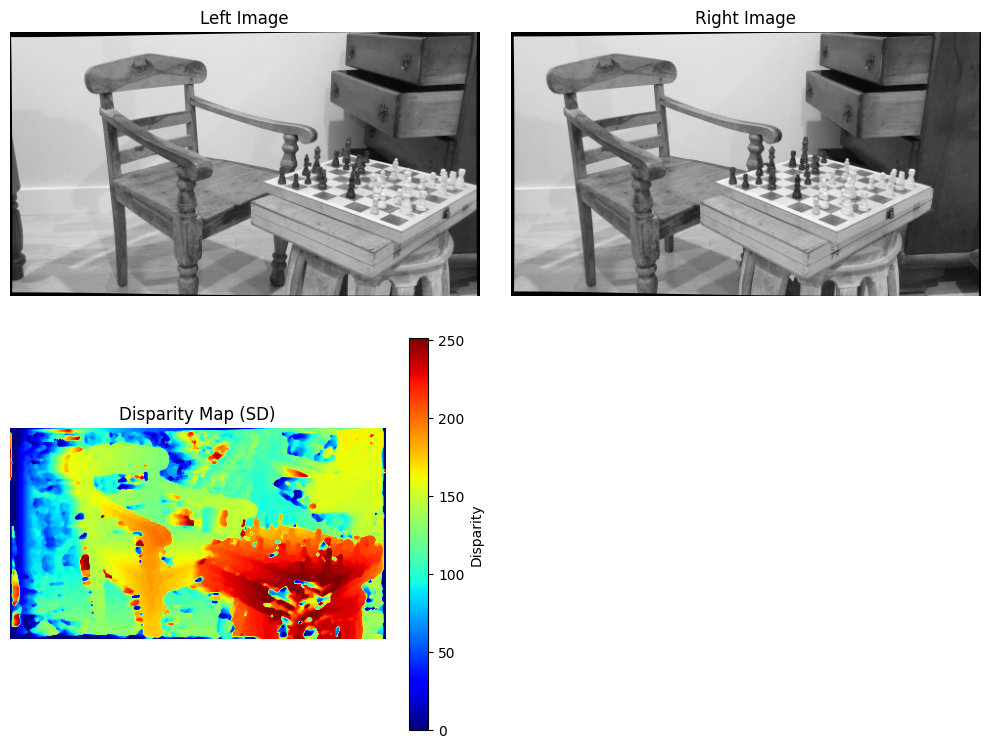

In [ ]:
# plot results

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(l_image, cmap="gray")
plt.title("Left Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(r_image, cmap="gray")
plt.title("Right Image")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(disparity_map, cmap="jet")
plt.title("Disparity Map")
plt.colorbar(label="Disparity")
plt.axis("off")

plt.tight_layout()
plt.show()